# Import

In [2]:
import pandas as pd

In [30]:
data = pd.read_csv('Data\data.csv', sep=",")
pal_max = pd.read_csv('Data\palette max.csv', sep=",")

Expression des besoins :

- Situation à date des flux (répétition, expédition et stockage)
- Volume traité depuis le début d’année (réception, prépa expé)
- Taux de service si possible (Démandé/livré)

In [9]:
def etude_fichier(df):
    # Etude du fichier 
    print("Forme du Dataframe :", df.shape)
    print()
    print("Le type est : \n", df.dtypes)
    print()
    print('Nombre de unique')
    print(df.nunique())
    print()
    print('le nombre de null est :\n',df.isnull().sum())

In [31]:
data.head()

,Art_Libelle,Sum of Bml_NbPalette,Sum of Bml_NbColis,Enseigne,Sum of Difference_palettes,Art_Code,Bme_Par_Nom,Sum of Bme_StatutBon,Bme_Par_Pay_Libelle,Sum of Bml_NbColisInit,Sum of Bml_NbPaletteInit,Sum of Difference_Colis,Sum of Difference_Dates,type,type de bon,Bme_DateBon,Bme_DateCreation
0,10 TP Cabillaud MSC 10x510g F,17,2448,NaN,0,96016238,FF BSM,450,NaN,2448,17,0,0,reception,Validé,2023-01-06 00:00:00,2023-01-06 00:00:00
1,10 TP Cabillaud MSC 10x510g F,26,3662,NaN,0,96016238,FF BSM,180,NaN,3662,26,0,0,reception,Validé,2023-01-13 00:00:00,2023-01-13 00:00:00
2,10 TP Cabillaud MSC 10x510g F,7,1008,NaN,0,96016238,FF BSM,180,NaN,1008,7,0,0,reception,Validé,2023-01-16 00:00:00,2023-01-16 00:00:00
3,10 TP Cabillaud MSC 10x510g F,16,2260,NaN,0,96016238,FF BSM,180,NaN,2260,16,0,0,reception,Validé,2023-01-25 00:00:00,2023-01-25 00:00:00
4,10 TP Cabillaud MSC 10x510g F,4,576,NaN,0,96016238,FF BSM,90,NaN,576,4,0,1,reception,Validé,2023-01-26 00:00:00,2023-01-25 00:00:00


In [32]:
data.describe(include='all')

,Art_Libelle,Sum of Bml_NbPalette,Sum of Bml_NbColis,Enseigne,Sum of Difference_palettes,Art_Code,Bme_Par_Nom,Sum of Bme_StatutBon,Bme_Par_Pay_Libelle,Sum of Bml_NbColisInit,Sum of Bml_NbPaletteInit,Sum of Difference_Colis,Sum of Difference_Dates,type,type de bon,Bme_DateBon,Bme_DateCreation
count,29999,29999.000000,29999.000000,28419,29999.000000,2.999900e+04,27927,29999.000000,25595,29999.000000,29999.000000,29999.000000,29999.000000,29999,29999,29999,29999
unique,112,NaN,NaN,13,NaN,NaN,265,NaN,10,NaN,NaN,NaN,NaN,2,8,122,119
top,4 Fil Colin beign. fish chips MSC 6x400g,NaN,NaN,AUTRE,NaN,NaN,SCANORMANDE-ENTREPOT 32 (0010500794),NaN,FRANCE,NaN,NaN,NaN,NaN,expedition,Validé,2023-04-11 00:00:00,2023-01-02 00:00:00
freq,1528,NaN,NaN,8252,NaN,NaN,865,NaN,25537,NaN,NaN,NaN,NaN,28419,29564,419,639
mean,NaN,1.839561,238.709857,NaN,0.207640,9.601518e+07,NaN,93.832094,NaN,238.842828,2.047202,0.132971,2.743291,NaN,NaN,NaN,NaN
std,NaN,5.731912,735.428633,NaN,1.168537,2.861288e+03,NaN,31.132049,NaN,735.422040,5.800651,5.735789,1.930713,NaN,NaN,NaN,NaN
min,NaN,0.000000,0.000000,NaN,-16.000000,9.600800e+07,NaN,1.000000,NaN,0.000000,0.000000,0.000000,-12.000000,NaN,NaN,NaN,NaN
25%,NaN,0.000000,26.000000,NaN,0.000000,9.601394e+07,NaN,90.000000,NaN,26.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,NaN
50%,NaN,1.000000,112.000000,NaN,0.000000,9.601571e+07,NaN,90.000000,NaN,112.000000,1.000000,0.000000,2.000000,NaN,NaN,NaN,NaN
75%,NaN,1.000000,154.000000,NaN,0.000000,9.601692e+07,NaN,90.000000,NaN,154.000000,1.000000,0.000000,4.000000,NaN,NaN,NaN,NaN


In [ ]:
# Calcul de la différence entre les colonnes de colis
data['Difference_Colis'] = data['Bml_NbColisInit'] - data['Bml_NbColis']
# Calcul de la différence entre les colonnes de colis
data['Difference_palettes'] = data['Bml_NbPaletteInit'] - data['Bml_NbPalette']
data.head()

In [ ]:
# Conversion des colonnes de dates en format de date
data['Bme_DateCreation'] = pd.to_datetime(data['data_Bme_DateCreation'], format='%d/%m/%Y %H:%M:%S').dt.date
data['Bme_DateBon'] = pd.to_datetime(data['data_Bme_DateBon'], format='%d/%m/%Y %H:%M:%S',  errors='coerce').dt.date

In [66]:
result = data.loc[data['Bme_DateBon'] == '2023-02-12']
result

,Bme_DateCreation,Bme_DateBon,Bme_Par_Nom,Bme_Par_Pay_Libelle,Art_Code,Art_Libelle,Bml_NbColisInit,Bml_NbColis,Bml_NbPaletteInit,Bml_NbPalette,Bme_StatutBon,type,Enseigne,Difference_Colis,Difference_palettes


In [67]:
data.head()

,Bme_DateCreation,Bme_DateBon,Bme_Par_Nom,Bme_Par_Pay_Libelle,Art_Code,Art_Libelle,Bml_NbColisInit,Bml_NbColis,Bml_NbPaletteInit,Bml_NbPalette,Bme_StatutBon,type,Enseigne,Difference_Colis,Difference_palettes
0,2023-02-12,2023-06-06,SOFRILOG MARNE,NaN,96010427,Pommes grenaille 10X450g,9,9,1,1,10,reception,NaN,0,0
1,2023-06-07,2023-06-13,SCADIF,NaN,96013680,Croustibat petits tresors 6X450g MSC,132,132,1,1,1,reception,NaN,0,0
2,2023-06-07,2023-06-13,SCADIF,NaN,96013938,6 Croquettes MSC AFH 8X300g D,182,182,1,1,1,reception,NaN,0,0
3,2023-06-07,2023-06-13,SCADIF,NaN,96014114,18 Croustibat Cabillaud 10X450g MSC,160,160,1,1,1,reception,NaN,0,0
4,2023-06-07,2023-06-13,SCADIF,NaN,96015029,16 Batonnets Colin Alaska 12X448g MSC,136,136,1,1,1,reception,NaN,0,0


In [68]:
# Conversion des colonnes de dates en format de date
data['Bme_DateCreation'] = pd.to_datetime(data['Bme_DateCreation'], format='%Y-%m-%d %H:%M:%S', errors='coerce').dt.date
data['Bme_DateBon'] = pd.to_datetime(data['Bme_DateBon'], format='%Y-%m-%d %H:%M:%S', errors='coerce').dt.date

# Calcul de la différence entre les deux dates
data['Difference_Dates'] = data['Bme_DateBon'] - data['Bme_DateCreation']


In [69]:
data.dtypes

Bme_DateCreation                object
Bme_DateBon                     object
Bme_Par_Nom                     object
Bme_Par_Pay_Libelle             object
Art_Code                         int64
Art_Libelle                     object
Bml_NbColisInit                  int64
Bml_NbColis                      int64
Bml_NbPaletteInit                int64
Bml_NbPalette                    int64
Bme_StatutBon                    int64
type                            object
Enseigne                        object
Difference_Colis                 int64
Difference_palettes              int64
Difference_Dates       timedelta64[ns]
dtype: object

In [70]:
data.dtypes

Bme_DateCreation                object
Bme_DateBon                     object
Bme_Par_Nom                     object
Bme_Par_Pay_Libelle             object
Art_Code                         int64
Art_Libelle                     object
Bml_NbColisInit                  int64
Bml_NbColis                      int64
Bml_NbPaletteInit                int64
Bml_NbPalette                    int64
Bme_StatutBon                    int64
type                            object
Enseigne                        object
Difference_Colis                 int64
Difference_palettes              int64
Difference_Dates       timedelta64[ns]
dtype: object

In [71]:
# Conversion des colonnes de dates en format de date
data['Bme_DateCreation'] = pd.to_datetime(data['Bme_DateCreation'], format='%Y-%m-%d')
data['Bme_DateBon'] = pd.to_datetime(data['Bme_DateBon'], format='%Y-%m-%d')

In [72]:
data.dtypes

Bme_DateCreation        datetime64[ns]
Bme_DateBon             datetime64[ns]
Bme_Par_Nom                     object
Bme_Par_Pay_Libelle             object
Art_Code                         int64
Art_Libelle                     object
Bml_NbColisInit                  int64
Bml_NbColis                      int64
Bml_NbPaletteInit                int64
Bml_NbPalette                    int64
Bme_StatutBon                    int64
type                            object
Enseigne                        object
Difference_Colis                 int64
Difference_palettes              int64
Difference_Dates       timedelta64[ns]
dtype: object

In [73]:
data.head()

,Bme_DateCreation,Bme_DateBon,Bme_Par_Nom,Bme_Par_Pay_Libelle,Art_Code,Art_Libelle,Bml_NbColisInit,Bml_NbColis,Bml_NbPaletteInit,Bml_NbPalette,Bme_StatutBon,type,Enseigne,Difference_Colis,Difference_palettes,Difference_Dates
0,2023-02-12,2023-06-06,SOFRILOG MARNE,NaN,96010427,Pommes grenaille 10X450g,9,9,1,1,10,reception,NaN,0,0,114 days
1,2023-06-07,2023-06-13,SCADIF,NaN,96013680,Croustibat petits tresors 6X450g MSC,132,132,1,1,1,reception,NaN,0,0,6 days
2,2023-06-07,2023-06-13,SCADIF,NaN,96013938,6 Croquettes MSC AFH 8X300g D,182,182,1,1,1,reception,NaN,0,0,6 days
3,2023-06-07,2023-06-13,SCADIF,NaN,96014114,18 Croustibat Cabillaud 10X450g MSC,160,160,1,1,1,reception,NaN,0,0,6 days
4,2023-06-07,2023-06-13,SCADIF,NaN,96015029,16 Batonnets Colin Alaska 12X448g MSC,136,136,1,1,1,reception,NaN,0,0,6 days


In [74]:
december_dates = data[data['Bme_DateCreation'].dt.month == 12]['Bme_DateCreation']

december_dates

41      2022-12-30
42      2022-12-30
75      2022-12-28
95      2022-12-15
96      2022-12-15
           ...    
44189   2022-12-29
44190   2022-12-29
44191   2022-12-29
44192   2022-12-29
44193   2022-12-29
Name: Bme_DateCreation, Length: 398, dtype: datetime64[ns]

In [75]:
# Calcul de la différence en jours entre les deux dates (sans partie temporelle)
data['Difference_Dates'] = (data['Bme_DateBon'].dt.floor('d') - data['Bme_DateCreation'].dt.floor('d')).dt.days

In [76]:
etude_fichier(data)

Forme du Dataframe : (49219, 16)

Le type est : 
 Bme_DateCreation       datetime64[ns]
Bme_DateBon            datetime64[ns]
Bme_Par_Nom                    object
Bme_Par_Pay_Libelle            object
Art_Code                        int64
Art_Libelle                    object
Bml_NbColisInit                 int64
Bml_NbColis                     int64
Bml_NbPaletteInit               int64
Bml_NbPalette                   int64
Bme_StatutBon                   int64
type                           object
Enseigne                       object
Difference_Colis                int64
Difference_palettes             int64
Difference_Dates                int64
dtype: object

Nombre de unique
Bme_DateCreation        121
Bme_DateBon             123
Bme_Par_Nom             356
Bme_Par_Pay_Libelle      13
Art_Code                233
Art_Libelle             231
Bml_NbColisInit        1302
Bml_NbColis            1302
Bml_NbPaletteInit        48
Bml_NbPalette            47
Bme_StatutBon             9
ty

In [77]:
data.head()

,Bme_DateCreation,Bme_DateBon,Bme_Par_Nom,Bme_Par_Pay_Libelle,Art_Code,Art_Libelle,Bml_NbColisInit,Bml_NbColis,Bml_NbPaletteInit,Bml_NbPalette,Bme_StatutBon,type,Enseigne,Difference_Colis,Difference_palettes,Difference_Dates
0,2023-02-12,2023-06-06,SOFRILOG MARNE,NaN,96010427,Pommes grenaille 10X450g,9,9,1,1,10,reception,NaN,0,0,114
1,2023-06-07,2023-06-13,SCADIF,NaN,96013680,Croustibat petits tresors 6X450g MSC,132,132,1,1,1,reception,NaN,0,0,6
2,2023-06-07,2023-06-13,SCADIF,NaN,96013938,6 Croquettes MSC AFH 8X300g D,182,182,1,1,1,reception,NaN,0,0,6
3,2023-06-07,2023-06-13,SCADIF,NaN,96014114,18 Croustibat Cabillaud 10X450g MSC,160,160,1,1,1,reception,NaN,0,0,6
4,2023-06-07,2023-06-13,SCADIF,NaN,96015029,16 Batonnets Colin Alaska 12X448g MSC,136,136,1,1,1,reception,NaN,0,0,6


In [78]:
# Conversion des colonnes de dates en format de date
data['Bme_DateCreation'] = pd.to_datetime(data['Bme_DateCreation'])

# Vérification des dates correspondant à décembre 2023
is_december_2023 = (data['Bme_DateCreation'].dt.month == 12) & (data['Bme_DateCreation'].dt.year == 2023)

# Affichage des lignes correspondantes
december_2023_dates = data[is_december_2023]
print(december_2023_dates)


Empty DataFrame
Columns: [Bme_DateCreation, Bme_DateBon, Bme_Par_Nom, Bme_Par_Pay_Libelle, Art_Code, Art_Libelle, Bml_NbColisInit, Bml_NbColis, Bml_NbPaletteInit, Bml_NbPalette, Bme_StatutBon, type, Enseigne, Difference_Colis, Difference_palettes, Difference_Dates]
Index: []


In [79]:
# Extraction de la partie de la date uniquement dans les colonnes de dates
data['Bme_DateCreation'] = data['Bme_DateCreation'].dt.date
data['Bme_DateBon'] = data['Bme_DateBon'].dt.date


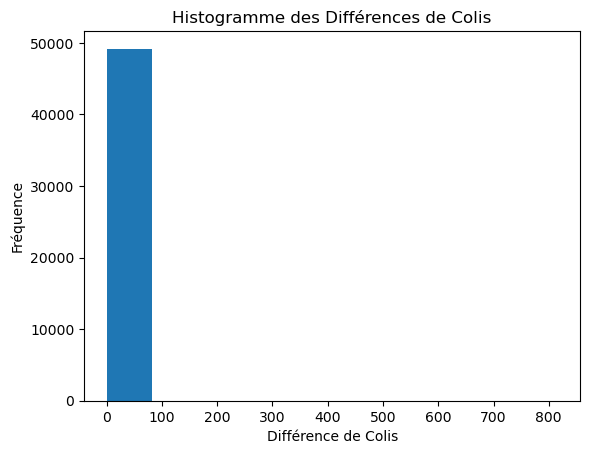

In [80]:
import matplotlib.pyplot as plt

# Création d'un histogramme des différences de palettes
plt.hist(data['Difference_Colis'], bins=10)
plt.xlabel('Différence de Colis')
plt.ylabel('Fréquence')
plt.title('Histogramme des Différences de Colis')
plt.show()


In [81]:
data['Bme_StatutBon'] = data['Bme_StatutBon'].astype(str)

In [82]:
import numpy as np

# Définition des conditions et des valeurs correspondantes
conditions = [
    data['Bme_StatutBon'] == '1',
    data['Bme_StatutBon'] == '10',
    data['Bme_StatutBon'] == '14',
    data['Bme_StatutBon'] == '16',
    data['Bme_StatutBon'] == '40',
    data['Bme_StatutBon'] == '50',
    data['Bme_StatutBon'] == '55',
    data['Bme_StatutBon'] == '70',
    data['Bme_StatutBon'] == '90'
]
values = [
    'crée',
    'en cours de stockage',
    'en cours de chargement',
    'déchargement terminé',
    'en cours de préparation',
    'en cours de controle Cab',
    'controle chargement termine',
    'contrôle',
    'Validé'
]

# Attribution des termes correspondants aux codes
data['type de bon'] = np.select(conditions, values, default='')

In [83]:
data['type de bon']

0        en cours de stockage
1                        crée
2                        crée
3                        crée
4                        crée
                 ...         
49214                  Validé
49215                  Validé
49216                  Validé
49217                  Validé
49218                  Validé
Name: type de bon, Length: 49219, dtype: object

In [84]:
etude_fichier(data)

Forme du Dataframe : (49219, 17)

Le type est : 
 Bme_DateCreation       object
Bme_DateBon            object
Bme_Par_Nom            object
Bme_Par_Pay_Libelle    object
Art_Code                int64
Art_Libelle            object
Bml_NbColisInit         int64
Bml_NbColis             int64
Bml_NbPaletteInit       int64
Bml_NbPalette           int64
Bme_StatutBon          object
type                   object
Enseigne               object
Difference_Colis        int64
Difference_palettes     int64
Difference_Dates        int64
type de bon            object
dtype: object

Nombre de unique
Bme_DateCreation        121
Bme_DateBon             123
Bme_Par_Nom             356
Bme_Par_Pay_Libelle      13
Art_Code                233
Art_Libelle             231
Bml_NbColisInit        1302
Bml_NbColis            1302
Bml_NbPaletteInit        48
Bml_NbPalette            47
Bme_StatutBon             9
type                      2
Enseigne                 13
Difference_Colis         36
Difference_palet

In [85]:
data.head()

,Bme_DateCreation,Bme_DateBon,Bme_Par_Nom,Bme_Par_Pay_Libelle,Art_Code,Art_Libelle,Bml_NbColisInit,Bml_NbColis,Bml_NbPaletteInit,Bml_NbPalette,Bme_StatutBon,type,Enseigne,Difference_Colis,Difference_palettes,Difference_Dates,type de bon
0,2023-02-12,2023-06-06,SOFRILOG MARNE,NaN,96010427,Pommes grenaille 10X450g,9,9,1,1,10,reception,NaN,0,0,114,en cours de stockage
1,2023-06-07,2023-06-13,SCADIF,NaN,96013680,Croustibat petits tresors 6X450g MSC,132,132,1,1,1,reception,NaN,0,0,6,crée
2,2023-06-07,2023-06-13,SCADIF,NaN,96013938,6 Croquettes MSC AFH 8X300g D,182,182,1,1,1,reception,NaN,0,0,6,crée
3,2023-06-07,2023-06-13,SCADIF,NaN,96014114,18 Croustibat Cabillaud 10X450g MSC,160,160,1,1,1,reception,NaN,0,0,6,crée
4,2023-06-07,2023-06-13,SCADIF,NaN,96015029,16 Batonnets Colin Alaska 12X448g MSC,136,136,1,1,1,reception,NaN,0,0,6,crée


In [86]:
# Calcul de la somme des palettes en réception par groupe
somme_palettes_reception = data[data['type'] == 'reception']['Bml_NbPalette'].sum()

# Calcul de la somme des palettes en expédition par groupe
somme_palettes_expedition = data[data['type'] == 'expedition']['Bml_NbPalette'].sum()

# Calcul de la différence
difference_palettes = somme_palettes_reception - somme_palettes_expedition

print("Différence entre les palettes en réception et en expédition:", difference_palettes)

Différence entre les palettes en réception et en expédition: -1412


In [87]:
etude_fichier(data)

Forme du Dataframe : (49219, 17)

Le type est : 
 Bme_DateCreation       object
Bme_DateBon            object
Bme_Par_Nom            object
Bme_Par_Pay_Libelle    object
Art_Code                int64
Art_Libelle            object
Bml_NbColisInit         int64
Bml_NbColis             int64
Bml_NbPaletteInit       int64
Bml_NbPalette           int64
Bme_StatutBon          object
type                   object
Enseigne               object
Difference_Colis        int64
Difference_palettes     int64
Difference_Dates        int64
type de bon            object
dtype: object

Nombre de unique
Bme_DateCreation        121
Bme_DateBon             123
Bme_Par_Nom             356
Bme_Par_Pay_Libelle      13
Art_Code                233
Art_Libelle             231
Bml_NbColisInit        1302
Bml_NbColis            1302
Bml_NbPaletteInit        48
Bml_NbPalette            47
Bme_StatutBon             9
type                      2
Enseigne                 13
Difference_Colis         36
Difference_palet

In [88]:
# Calcul des statistiques descriptives pour les colonnes numériques
descriptive_stats = data[['Bml_NbColis', 'Bml_NbPalette']].describe()
print(descriptive_stats)

        Bml_NbColis  Bml_NbPalette
count  49219.000000   49219.000000
mean     217.762409       1.818729
std      537.231190       4.463074
min    -3168.000000       0.000000
25%       24.000000       0.000000
50%      100.000000       1.000000
75%      168.000000       1.000000
max     7096.000000      56.000000


In [89]:
# Calcul de la corrélation entre 'Bml_NbColis' et 'Bml_NbPalette'
correlation = data[['Bml_NbColis', 'Bml_NbPalette']].corr()
print(correlation)

               Bml_NbColis  Bml_NbPalette
Bml_NbColis       1.000000       0.939931
Bml_NbPalette     0.939931       1.000000


In [90]:
data.to_csv('C:\\Users\\antoine_jeambourquin\\Desktop\\findus\\data.csv', index=False)

In [91]:
data.tail(10)

,Bme_DateCreation,Bme_DateBon,Bme_Par_Nom,Bme_Par_Pay_Libelle,Art_Code,Art_Libelle,Bml_NbColisInit,Bml_NbColis,Bml_NbPaletteInit,Bml_NbPalette,Bme_StatutBon,type,Enseigne,Difference_Colis,Difference_palettes,Difference_Dates,type de bon
49209,2023-06-09,2023-06-12,SCAOUEST (0010500794),FRANCE,96014454,Crousti Bistro Ondulee 6x260g,112,112,1,1,90,expedition,LECLERC,0,0,3,Validé
49210,2023-06-09,2023-06-12,SCAOUEST (0010500794),FRANCE,96014456,Crousti Bistro Classique 6x260g,112,112,1,1,90,expedition,LECLERC,0,0,3,Validé
49211,2023-06-09,2023-06-12,SCAOUEST (0010500794),FRANCE,96016909,18 Croustibat MSC 10X540g FF,136,136,0,1,90,expedition,LECLERC,0,-1,3,Validé
49212,2023-06-09,2023-06-12,SCAOUEST (0010500794),FRANCE,96018342,Pommes croustines 6X420g BRD P2,192,192,2,1,90,expedition,LECLERC,0,1,3,Validé
49213,2023-06-09,2023-06-12,SCAOUEST (0010500794),FRANCE,96018529,Epinards branches creme 10X480g G,128,128,1,1,90,expedition,LECLERC,0,0,3,Validé
49214,2023-06-09,2023-06-12,SCAOUEST (0010500794),FRANCE,96016528,Epinards haches creme 12X500g NS,96,96,1,1,90,expedition,LECLERC,0,0,3,Validé
49215,2023-06-09,2023-06-12,SCAOUEST (0010500794),FRANCE,96018809,Epinards haches creme 10x900g NSA P2,63,63,1,0,90,expedition,LECLERC,0,1,3,Validé
49216,2023-06-09,2023-06-12,SCAOUEST (0010500794),FRANCE,96018786,Crousti Express La Classique 12x2x100g,360,360,3,3,90,expedition,LECLERC,0,0,3,Validé
49217,2023-06-09,2023-06-12,SCAOUEST (0010500794),FRANCE,96018837,Crousti Express L'Allumette 12x2x100g,240,240,2,2,90,expedition,LECLERC,0,0,3,Validé
49218,2023-06-09,2023-06-12,SCAOUEST (0010500794),FRANCE,96018838,Crousti Express Les Quartiers 12x2x100g,120,120,0,1,90,expedition,LECLERC,0,-1,3,Validé


In [92]:
etude_fichier(data)

Forme du Dataframe : (49219, 17)

Le type est : 
 Bme_DateCreation       object
Bme_DateBon            object
Bme_Par_Nom            object
Bme_Par_Pay_Libelle    object
Art_Code                int64
Art_Libelle            object
Bml_NbColisInit         int64
Bml_NbColis             int64
Bml_NbPaletteInit       int64
Bml_NbPalette           int64
Bme_StatutBon          object
type                   object
Enseigne               object
Difference_Colis        int64
Difference_palettes     int64
Difference_Dates        int64
type de bon            object
dtype: object

Nombre de unique
Bme_DateCreation        121
Bme_DateBon             123
Bme_Par_Nom             356
Bme_Par_Pay_Libelle      13
Art_Code                233
Art_Libelle             231
Bml_NbColisInit        1302
Bml_NbColis            1302
Bml_NbPaletteInit        48
Bml_NbPalette            47
Bme_StatutBon             9
type                      2
Enseigne                 13
Difference_Colis         36
Difference_palet

In [93]:
import pandas as pd

data = {
    'Année': [2019, 2020, 2021, 2022, 2023],
    'Janvier': [8918, 10167, 11562, 9478, 11529],
    'Février': [9762, 10861, 11667, 11162, 12201],
    'Mars': [10498, 10377, 11240, 12326, 13242],
    'Avril': [11697, 8662, 11356, 13335, 12914],
    'Mai': [12215, 9555, 9219, 12873, 11624],
    'Juin': [13416, 10843, 10926, 12768, None],
    'Juillet': [14495, 13005, 13464, 13025, None],
    'Août': [14539, 12844, 13569, 13362, None],
    'Sept.': [14133, 11506, 12871, 13780, None],
    'Octobre': [14952, 12516, 12010, 13927, None],
    'Novembre': [15581, 14040, 13179, 13288, None],
    'Décembre': [15207, 14527, 13123, 13314, None]
}

df = pd.DataFrame(data)

# Transposer le DataFrame pour avoir les mois en tant que colonnes
df_transposed = df.set_index('Année').transpose().reset_index()

# Utiliser melt() pour obtenir un DataFrame avec des lignes
df_melted = df_transposed.melt(id_vars='index', value_vars=df_transposed.columns[1:], var_name='Mois', value_name='Ventes')

# Renommer les colonnes
df_melted.columns = ['Mois', 'Année', 'Nb palettes jour max.']

# Convertir la colonne 'Année' en type entier
df_melted['Année'] = df_melted['Année'].astype(int)


In [94]:
df_melted

,Mois,Année,Nb palettes jour max.
0,Janvier,2019,8918.0
1,Février,2019,9762.0
2,Mars,2019,10498.0
3,Avril,2019,11697.0
4,Mai,2019,12215.0
5,Juin,2019,13416.0
6,Juillet,2019,14495.0
7,Août,2019,14539.0
8,Sept.,2019,14133.0
9,Octobre,2019,14952.0


In [96]:
import pandas as pd
import locale

# Définir la locale française
locale.setlocale(locale.LC_TIME, 'fr_FR')

# Convertir la colonne 'Mois' et 'Année' en datetime
df_melted['Date'] = pd.to_datetime(df_melted['Mois'] + ' ' + df_melted['Année'].astype(str), format='%B %Y', errors='coerce')

# Formater la colonne 'Date' au format '%Y-%m-%d'
df_melted['Date'] = df_melted['Date'].dt.strftime('%Y-%m-%d')


In [101]:
df_melted['Nb palettes jour max.'] = df_melted['Nb palettes jour max.'].fillna(0).astype(int)


In [102]:
df_melted.dtypes

Mois                     object
Année                     int32
Nb palettes jour max.     int32
Date                     object
dtype: object

In [103]:
df_melted.head()

,Mois,Année,Nb palettes jour max.,Date
0,Janvier,2019,8918,2019-01-01
1,Février,2019,9762,2019-02-01
2,Mars,2019,10498,2019-03-01
3,Avril,2019,11697,2019-04-01
4,Mai,2019,12215,2019-05-01


In [104]:
df_melted.to_csv('C:\\Users\\antoine_jeambourquin\\Desktop\\findus\\palettemax.csv', index=False)